### 라이브러리 로딩
- 나눔고딕 출처 https://hangeul.naver.com/font

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib 
from matplotlib.ticker import ScalarFormatter

nanum_gothic = fm.FontProperties(fname='NanumGothic.ttf').get_name()
matplotlib.rc('font',family=nanum_gothic)

#### 시각화를 위한 컬러맵

In [8]:
my_cmap = plt.get_cmap("coolwarm")
green_cmap = plt.get_cmap("Greens")
red_cmap = plt.get_cmap("Reds")
magenta_cmap = plt.get_cmap("PiYG")

def rescale_blue(y):
    y = np.array(y)
    P = y / -120
    N = y / np.min(y) / 1.2
    return (P/2+0.4) * (y>0) + (0.5+N/2) * (y<0)

def rescale_red(y):
    y = np.array(y) / 120
    return y + 0.5

def rescale_green(y):
    y = np.array(y) / 120
    return y

# def rescale_magenta(y):
#     y = np.array(y) / 150
#     return y

def rescale_magenta(y):
    y = np.array(y)
    P = y / -np.max(y)
    return P/2 + 0.3

#### 매해 1등 1인당 당첨 금액 계산
- https://dhlottery.co.kr/gameResult.do?method=allWinPrint&gubun=byWin&nowPage=&drwNoStart=1&drwNoEnd=960
- 한 해 1등 당첨 금액의 평균
  - $\text{1인당 당첨금액}^{(Y 년)} = \frac{\sum_{X 회차 \in Y 년}{(X회차 1등 1인당 당첨금액) \times (X 회차 1등 당첨자 수)}}{\sum_{X 회차 \in Y 년}{(X 회차 1등 당첨자 수)}}$

In [14]:
#Lpd = pd.DataFrame.from_csv('lottery_stats.csv', sep=',', index_col=None)
Lpd = pd.read_csv('lottery_stats.csv', sep=',', index_col=None)
#L = Lpd.as_matrix() # I prefer array and martix
L = Lpd.to_numpy() # I prefer array and martix
stats_dict = dict()

n2003=1
for k in L:
    dN, dM = int(k[5][0:-1]), int(k[6])
    N = dN
    M = dN * dM

    if k[0] in stats_dict:
        n, m = stats_dict[k[0]]
        N += n
        M += m

    if(k[0] == 2003): # verify why the prize for 2003 is too large. 
        print(k[0], n2003, M, N, dM*dN, dN)
        n2003 += 1
        
    stats_dict[(k[0])] = (N, M)
    
Lprize = []
for i in stats_dict.keys():
    N, M = stats_dict[i]
    Lprize.insert(0, M/N)
Lprize = np.asarray(Lprize)/10000 # (원 >> 만원)

2003 1 15110283600 4 15110283600 4
2003 2 29287882800 6 14177599200 2
2003 3 44733762600 9 15445879800 3
2003 4 59776875600 12 15043113000 3
2003 5 75380255200 16 15603379600 4
2003 6 89906957200 22 14526702000 6
2003 7 105588141400 25 15681184200 3
2003 8 119360673600 32 13772532200 7
2003 9 133854715200 38 14494041600 6
2003 10 150104927200 43 16250212000 5
2003 11 166088203600 46 15983276400 3
2003 12 182801039200 48 16712835600 2
2003 13 199611818200 53 16810779000 5
2003 14 217361449000 54 17749630800 1
2003 15 258757129600 60 41395680600 6
2003 16 258757129600 60 0 0
2003 17 273676610800 73 14919481200 13
2003 18 289419103600 79 15742492800 6
2003 19 305543702800 82 16124599200 3
2003 20 320501701000 85 14957998200 3
2003 21 336516176800 86 16014475800 1
2003 22 351679971400 89 15163794600 3
2003 23 366964561400 94 15284590000 5
2003 24 381868079000 95 14903517600 1
2003 25 398213362000 105 16345283000 10
2003 26 414426707800 107 16213345800 2
2003 27 431883818800 109 17457111000

#### 소비자 물가 지표 기준 환산
- https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1060

In [15]:
# (2002 ~ 2020) and (2021 as 0)
inf_rate = [2.8,3.5,3.6,2.8,2.2,2.5,4.7,2.8,2.9,4.0,2.2,1.3,1.3,0.7,1.0,1.9,1.5,0.4,0.5,0.0]
inf_rate_mult = np.cumprod(1+np.array(inf_rate)/100)
inv_inf_rate_mult = np.flip(inf_rate_mult)

#### 예금 이자율
- http://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxSearch.do?idx_cd=1073&stts_cd=107303&freq=Y

In [16]:
# (2002~2020)
R = [4.73,4.15,3.75,3.62,4.41,5.07,5.71,3.26,3.19,3.69,3.43,2.73,2.43,1.74,1.48,1.56,1.87,1.75,1.05]
R_mult = np.cumprod(1+np.array(R)/100)
inv_R_mult = np.flip(R_mult)

#### 아파트 매매 가격
- 은마 아파트 가격
  - (2006.01~2021.2) 호갱노노 https://hogangnono.com/apt/1T2af/0/0
  - (2002~2005) 은마아파트 가격 변천사, 매일경제, https://www.mk.co.kr/news/home/view/2005/07/260557/

In [17]:
#(2006~2021)
Eunma = [95754, 103550, 96279, 98360, 87804, 91840, 81389, 77354, 86948, 88086, 103697, 115368, 153553, 174580, 193282, 217166]

#(2002~2005)
Eunma = [48500, 60000, 58500, 75000] + Eunma
Eunma = np.asarray(Eunma)

- 서울, 전국 아파트 실거래 중위가격 가격 (2006.01~2021.2)
https://kosis.kr/statHtml/statHtml.do?tblId=DT_KAB_11672_S16&orgId=408&language=kor&conn_path=&vw_cd=&list_id=

In [18]:
# Apd = pd.DataFrame.from_csv('apartment_stats.csv', encoding='CP949', index_col=0)
# Apt_month = Apd.as_matrix()
Apd = pd.read_csv('apartment_stats.csv', encoding='CP949', index_col=0)
Apt_month = Apd.to_numpy()

Apt_month = Apt_month[1:, [3,1,2]]
Apt_month = Apt_month.astype(np.float)

In [19]:
# (2006.1~2020.12), (2021.1~2021.2) * 6
pseudo_apt_month = np.concatenate([Apt_month, np.repeat(Apt_month[180:, :],5,axis=0)], axis=0)

# average out price over a year X (X.1~X12)
Apt_year = pseudo_apt_month.reshape(-1, 12, 3)
Apt_year = Apt_year.mean(axis=1)*100 # 100 m^2

- 2002~2006은 아파트 매매 가격 변화율을 역으로 이용해서 추정 (https://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxSearch.do?idx_cd=1240&stts_cd=124001&freq=Y) 
- 매매가격변동율 (65.1	65.2	63.2	66.3	79.8)

In [20]:
inc_R100 = [22.5, 6.9, -1.4, 6.3, 18.9] # 서울
inc_R = 1 + np.array(inc_R100)/100

index_P_0 = np.cumprod(inc_R, axis=0)
index_P_0 = index_P_0 / index_P_0[-1] # 서울 2002~2006

index_P_1 = [65.1, 65.2, 63.2, 66.3, 79.8] # 수도권 2002~2006
index_P_2 = [72.0, 70.9, 72.6, 74.1]    #  지방 2003~2006

In [21]:
def compute_price(price, index):
    new_prices = []
    for i in range(1, len(index)):
        new_prices.insert(0, price/index[-1]*index[-1-i])
    return np.array(new_prices)

# APT price in seoul in 2006
Apt_year_0 = np.concatenate([compute_price(Apt_year[0, 0], index_P_0), Apt_year[:, 0]])

# APT price capital region in 2006
Apt_year_1 = np.concatenate([compute_price(Apt_year[0, 1], index_P_1), Apt_year[:, 1]])

# APT price rural region in 2006
Apt_year_2 = np.concatenate([compute_price(Apt_year[0, 2], index_P_2), Apt_year[:, 2]])

#### 가계소득
- 2002은 2인 이상 도시 가구의 평균 소득 및 평균 가족 구성원 수 https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1L9I022 로 4인가구 평균 소득을 만들어냄 (2003~2019)

In [22]:
# H = pd.DataFrame.from_csv('household_income_stats.csv', encoding='CP949', index_col=0).transpose()
# h = H.as_matrix()
H = pd.read_csv('household_income_stats.csv', encoding='CP949', index_col=0).transpose()
h = H.to_numpy()

h = h[3:71] # 2003/Q1 [4] ~ 2019/Q4 [70]
Hincome = []
Hincome_avg = []
for i in range(0, len(h)): 
    #print(h[i][9]/h[i][0]*4) # normalize family income into 4 people.
    Hincome.append(h[i][9]/h[i][0]*4)
    Hincome_avg.append(h[i][9])
Hincome = np.array(Hincome)
Hincome = Hincome.reshape(-1, 4)
Hincome_year = np.mean(Hincome, axis=1)*12/10000
Hincome_year_2member = Hincome_year/2

Hincome_avg = np.array(Hincome_avg)
Hincome_avg = Hincome_avg.reshape(-1, 4)
Hincome_avg_year = np.mean(Hincome_avg, axis=1)*12/10000

- (2003~2020) 전체 가구 평균 소득과 평균 가족 구성원 수(https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1L9H008) 이걸 쓰려고 했으나 2002년이 없어서 제외

In [23]:
# C = pd.DataFrame.from_csv('household_income_city.csv', encoding='CP949', index_col=0).transpose()
# c = C.as_matrix()[3:-1, [0, 9]]

C = pd.read_csv('household_income_city.csv', encoding='CP949', index_col=0).transpose()
c = C.to_numpy()[3:-1, [0, 9]]

In [24]:
C

가구주교육정도별,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,...,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상,전문대졸이상
가계수지항목별,가구원수,가구원수,가구원수,가구주연령,가구주연령,가구주연령,가구분포,가구분포,가구분포,소득,...,처분가능소득,흑자액,흑자액,흑자액,흑자율,흑자율,흑자율,평균소비성향,평균소비성향,평균소비성향
항목,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,...,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구
단위,명,명,명,세,세,세,%,%,%,원,...,원,원,원,원,%,%,%,%,%,%
2002. 1/4,3.446,3.486,3.393,44.66,41.598,48.684,100,100,100,2.59192e+06,...,2.47507e+06,649294,788862,331488,23.333,27.035,13.393,76.667,72.965,86.607
2002. 2/4,3.421,3.46,3.369,44.746,41.565,48.974,100,100,100,2.55119e+06,...,2.35434e+06,631005,812367,190667,23.943,29.528,8.099,76.057,70.472,91.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019. 1/4,3.059,3.181,2.882,53.199,49.164,59.02,100,100,100,4.91772e+06,...,3.95303e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019. 2/4,3.069,3.183,2.895,53.167,49.51,58.747,100,100,100,4.80232e+06,...,4.10812e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019. 3/4,3.063,3.182,2.883,53.21,49.517,58.827,100,100,100,4.98395e+06,...,3.86553e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019. 4/4,3.071,3.187,2.892,53.341,49.665,59.028,100,100,100,4.88095e+06,...,3.99526e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 평균 기대 수명
- http://www.index.go.kr/unify/idx-info.do?idxCd=8016

#### 20살 평균 기대 여명
- https://gsis.kwdi.re.kr/statHtml/statHtml.do?orgId=338&tblId=DT_1B42#

#### 24살 평균 기대 여명
- 보통 24살에 자소서를 처음 쓴다고 함 https://www.etoday.co.kr/news/view/1666571

In [154]:
expected_life = [76.8,77.3,77.8,78.2,78.8,79.2,79.6,80.0,80.2,80.6,80.9,81.4,81.8,82.1,82.4,82.7,82.7,83.3] # (2002~2019)

# (2019 ~ 2002)
expected_life_at20 = [63.69,63.14,63.09,62.77,62.47,62.24,61.80,61.33,61.10,60.73,60.55,60.13,59.71,59.36,58.86,58.44,58.00,57.59]
# (2002 ~ 2019)
expected_life_at20.reverse()

expected_life_at24 = [59.77,59.22,59.16,58.84,58.54,58.31,57.89,57.41,57.19,56.84,56.66,56.24,55.82,55.45,54.97,54.54,54.11,53.70]
expected_life_at24.reverse()

expected_life_at40 = [38.3,38.8,39.1,39.6,40.0,40.4,40.8,41.3,41.4,41.8,41.9,42.4,42.8,43.0,43.3,43.6,43.7,44.2]

### 경제적 자유 시뮬레이션
- 2020년 임금 상승률 1.5% https://world.kbs.co.kr/service/news_view.htm?lang=k&Seq_Code=369158

모든 금액을 다 예금에 넣어두고, 계속 지출만 하고 몇 년을 버틸 수 있을까? (매달 지출액 = 4인 가구 평균 수입)

In [124]:
def compute_laborfree_year(Hincome_year, apartment=[], start_year=2002):
    k_labor_free = []
    for year in range(start_year, 2022):
        # start from Lotto 1-rank prize
        remain_money = Lprize[year-2002]
        
        # buy the apartment
        if(len(apartment) > 0):
            remain_money -= apartment[year-start_year]
    

        free_year = 0
        if(remain_money > 0):
            cont_condition = True
            offset = (year-2002)
        else:
            cont_condition = False

        while cont_condition:
            if free_year + offset < len(R):
                interest_r = R[free_year+offset]
            else:
                interest_r = R[-1]

            remain_money = remain_money * (1.0+interest_r/100)

            #print(free_year, year, offset, free_year+offset)
            if (free_year+offset) < len(Hincome_year):
                spending = Hincome_year[free_year+offset]
            else:
                spending = Hincome_year[-1]*((1.015)**(free_year-len(Hincome_year)))        

            if remain_money >= spending:
                remain_money = remain_money - spending
                free_year += 1
            else:
                cont_condition = False

        k_labor_free.append(float(free_year) + (remain_money / spending))
    return k_labor_free

# 2-member family
labor_free_year_2member = compute_laborfree_year(Hincome_year_2member)
labor_free_eunma = compute_laborfree_year(Hincome_year_2member, Eunma, 2002)
labor_free_seoul = compute_laborfree_year(Hincome_year_2member, Apt_year_0, 2002)
labor_free_metro = compute_laborfree_year(Hincome_year_2member, Apt_year_1, 2002)
labor_free_rural = compute_laborfree_year(Hincome_year_2member, Apt_year_2, 2003)

# typical family
labor_free_year_avg = compute_laborfree_year(Hincome_avg_year)
labor_free_eunma_avg = compute_laborfree_year(Hincome_avg_year, Eunma, 2002)
labor_free_seoul_avg = compute_laborfree_year(Hincome_avg_year, Apt_year_0, 2002)
labor_free_metro_avg = compute_laborfree_year(Hincome_avg_year, Apt_year_1, 2002)
labor_free_rural_avg = compute_laborfree_year(Hincome_avg_year, Apt_year_2, 2003)

# 4-member family

### 우리는 경제적 자유를 누릴 수 있다, 다만

In [27]:
len(Lprize), len(inv_inf_rate_mult)

(20, 20)

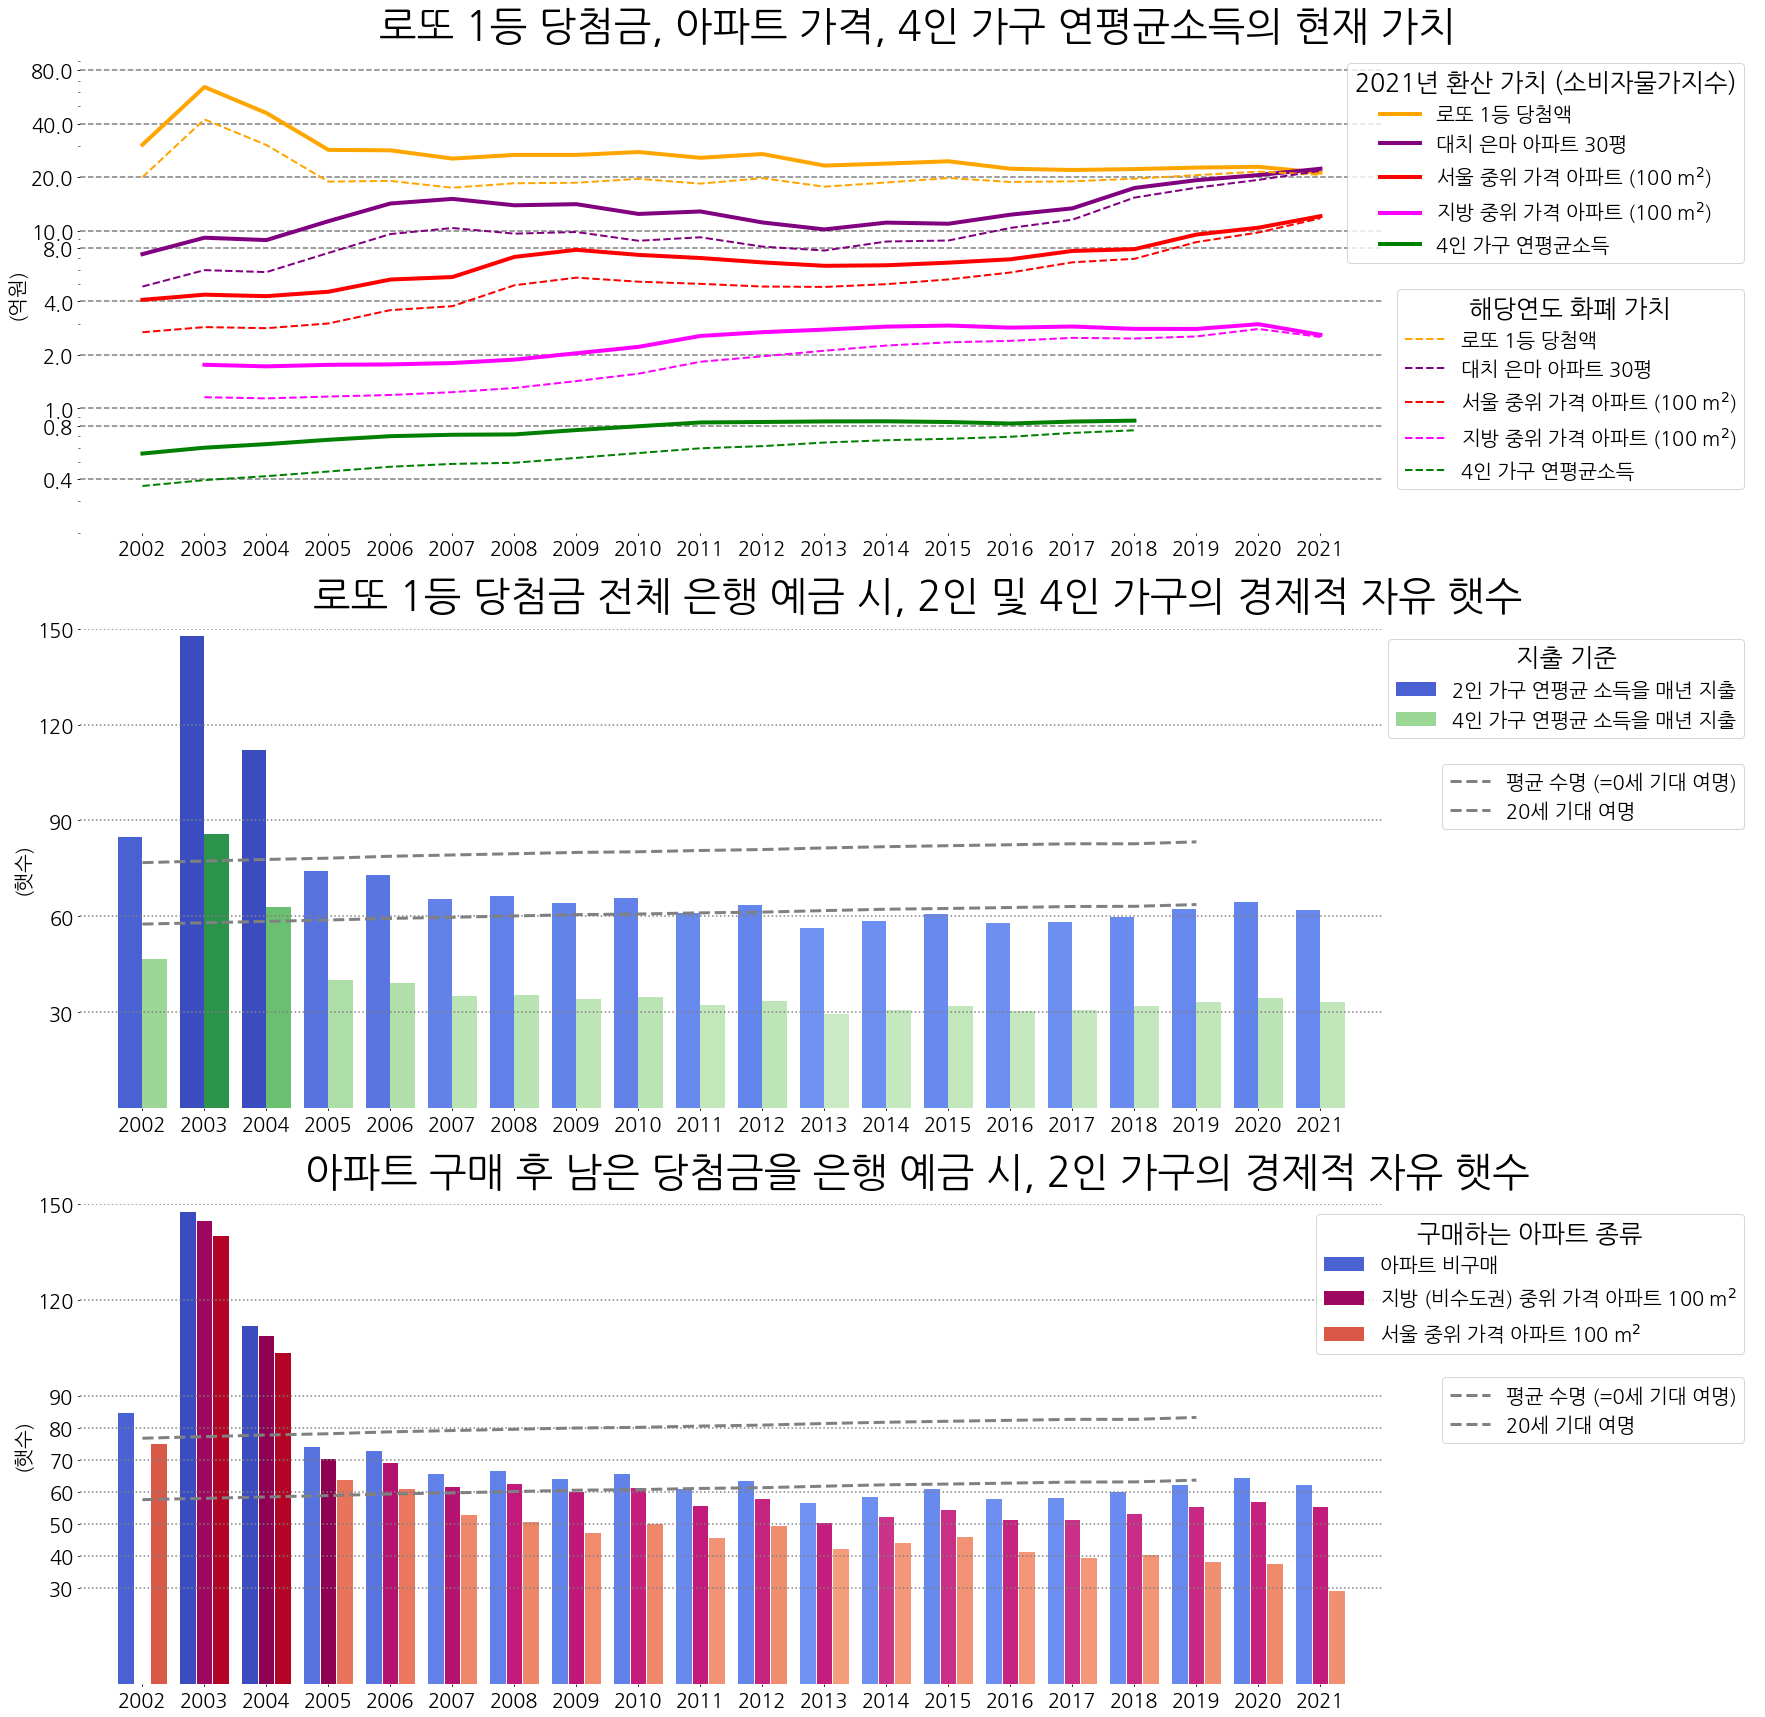

In [115]:
fig = plt.figure(figsize=(30,30))

###########################
# 1. 로또 1등 당첨금의 환산 가치
###########################

ax = plt.subplot(3, 1, 1)
plt.yscale('log', basey=10)
ax.yaxis.set_major_formatter(ScalarFormatter())

for _pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[_pos].set_visible(False)

# solid lines for converted price at 2020
legend_text = ['로또 1등 당첨액', '대치 은마 아파트 30평', '서울 중위 가격 아파트 (100 m$^2$)', '지방 중위 가격 아파트 (100 m$^2$)', '4인 가구 연평균소득']
s1, = plt.plot(range(2002,2022), Lprize * inv_inf_rate_mult/10000, linewidth=4, color='orange')
s2, = plt.plot(range(2002,2022), Eunma * inv_inf_rate_mult/10000, linewidth=4, color='purple')
s3, = plt.plot(range(2002,2022), Apt_year_0 * inv_inf_rate_mult/10000, linewidth=4, color='red')
s4, = plt.plot(range(2003,2022), Apt_year_2 * inv_inf_rate_mult[1:]/10000, linewidth=4, color='magenta')
s5, = plt.plot(range(2002,2019), Hincome_year * inv_inf_rate_mult[0:len(Hincome_year)]/10000, linewidth=4, color='g')
s_lines = [s1,s2,s3,s4,s5]

# dashed lines for price at each year
d1, = plt.plot(range(2002,2022), Lprize/10000, '--', linewidth=2, color='orange')
d2, = plt.plot(range(2002,2022), Eunma /10000, '--', linewidth=2, color='purple')
d3, = plt.plot(range(2002,2022), Apt_year_0/10000, '--', linewidth=2, color='red')
d4, = plt.plot(range(2003,2022), Apt_year_2/10000, '--', linewidth=2, color='magenta')
d5, = plt.plot(range(2002,2019), Hincome_year/10000, '--', linewidth=2, color='g')
#d5, = plt.plot(range(2002,2019), Hincome_year_2member/100, '--', linewidth=2, color='cyan')
d_lines = [d1,d2,d3,d4,d5]

# horizontal lines
yticks_list = [0.4, 0.8, 1, 2, 4, 8, 10, 20, 40, 80]
for i in yticks_list:
    plt.hlines(i, 2001, 2022, colors='gray', linestyles='--')

plt.xlim(2001,2028)
plt.ylim(2*10**-1, 10**2)
legend1_1 = ax.legend(s_lines, legend_text, fontsize=20, title_fontsize=25, title='2021년 환산 가치 (소비자물가지수)',
                    loc='upper right')#, bbox_to_anchor=(1.25, 1))
legend1_2 = ax.legend(d_lines, legend_text, fontsize=20, title_fontsize=25, title='해당연도 화폐 가치',
                    loc='center right', bbox_to_anchor=(1, 0.3))

plt.gca().add_artist(legend1_1)

plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks(yticks_list, fontsize=20)
plt.ylabel('(억원)', fontsize=20)
#plt.title('로또 1등 당첨금의 가치는 하락세, 아파트 가격와 평균 연봉은 상승세', fontsize=40, pad=15)
plt.title('로또 1등 당첨금, 아파트 가격, 4인 가구 연평균소득의 현재 가치', fontsize=40, pad=15)
#ax.yaxis.set_minor_formatter(ScalarFormatter())

#####################################
# 2. 가족 구성원 숫자에 따른 경제적 자유 햇수
#####################################

ax = plt.subplot(3, 1, 2)
for _pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[_pos].set_visible(False)

bar = np.array([i for i in range(2002,2022)])
width = 0.4
    
f1 = plt.bar(bar - width/2, labor_free_year_2member, width, color=my_cmap(rescale_blue(labor_free_year_2member)))
f2 = plt.bar(bar + width/2, labor_free_year, width, color=green_cmap(rescale_green(labor_free_year)))
labor_free_text = ['2인 가구 연평균 소득을 매년 지출', '4인 가구 연평균 소득을 매년 지출']

e1, = plt.plot(range(2002,2020), expected_life, '--', linewidth=3, color='gray')
e2, = plt.plot(range(2002,2020), expected_life_at20, '--', linewidth=3, color='gray')
life_text = ['평균 수명 (=0세 기대 여명)', '20세 기대 여명']

legend2_1 = ax.legend([f1, f2], labor_free_text, fontsize=20, title='지출 기준', title_fontsize=25,
                      loc='upper right',)
legend2_2 = ax.legend([e1, e2], life_text, fontsize=20, loc='center right', bbox_to_anchor=(1.0,0.65))

# horizontal lines
for val in [30, 60, 90, 120, 150]:
    plt.hlines(val, 2001, 2022, colors='gray', linestyles='dotted')

plt.gca().add_artist(legend2_1)

plt.xlim([2001,2028])
plt.ylim([0, 150])
plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks([30, 60, 90, 120, 150], fontsize=20, backgroundcolor='white')
plt.ylabel('(햇수)', fontsize=20)
#ax.set_title('로또 1등에 당첨되면, 아직까지도 2인 가구는 소비만 하면서 경제적 자유를 누릴 수 있다!', fontsize=40, backgroundcolor='white', pad=20)
ax.set_title('로또 1등 당첨금 전체 은행 예금 시, 2인 및 4인 가구의 경제적 자유 햇수', fontsize=40, backgroundcolor='white', pad=20)

##################################
# 3. 아파트 구매 여부에 따른 경제적 자유 햇수
##################################

ax = plt.subplot(3, 1, 3)
for _pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[_pos].set_visible(False)

a1 = plt.bar(bar - width/1.5, labor_free_year_2member, width/3*1.9, color=my_cmap(rescale_blue(labor_free_year_2member)))
a2 = plt.bar(bar[1:len(bar)], labor_free_rural, width/3*1.9, color=magenta_cmap(rescale_magenta(labor_free_year)))
a3 = plt.bar(bar + width/1.5, labor_free_seoul, width/3*1.9, color=my_cmap(rescale_red(labor_free_year)))
labor_free_text = ['아파트 비구매', '지방 (비수도권) 중위 가격 아파트 100 m$^2$', '서울 중위 가격 아파트 100 m$^2$']

e1, = plt.plot(range(2002,2020), expected_life, '--', linewidth=3, color='gray')
e2, = plt.plot(range(2002,2020), expected_life_at20, '--', linewidth=3, color='gray')
life_text = ['평균 수명 (=0세 기대 여명)', '20세 기대 여명']

legend2_1 = ax.legend([a1, a2, a3], labor_free_text, fontsize=20, title='구매하는 아파트 종류', title_fontsize=25,
                      loc='upper right',)
legend2_2 = ax.legend([e1, e2], life_text, fontsize=20, loc='center right', bbox_to_anchor=(1.0,0.57))

# horizontal lines
yticks3 = [30, 40, 50, 60, 70, 80, 90, 120, 150]
for val in yticks3:
    plt.hlines(val, 2001, 2022, colors='gray', linestyles='dotted')

plt.gca().add_artist(legend2_1)

plt.xlim([2001,2028])
plt.ylim([0, 150])
plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks(yticks3, fontsize=20, backgroundcolor='white')
plt.ylabel('(햇수)', fontsize=20)
ax.set_title('아파트 구매 후 남은 당첨금을 은행 예금 시, 2인 가구의 경제적 자유 햇수', fontsize=40, backgroundcolor='white', pad=20)
plt.show()

예외적인 2003~4년을 제외하면 로또 1등의 가치는 낮아졌습니다. 여전히 큰 돈이어서 로또 1등 당첨 시 아파트 구매없는 2인 가구는 여전히 경제적 자유를 누릴 수 있습니다. 하지만, 아파트를 사고 회사에 사표를 내는 로또 1등의 꿈은 이제 상상조차 불가능합니다.

Text(0.5, 1.0, '로또 1등 당첨금, 아파트 가격, 가구 연평균소득의 현재 가치')

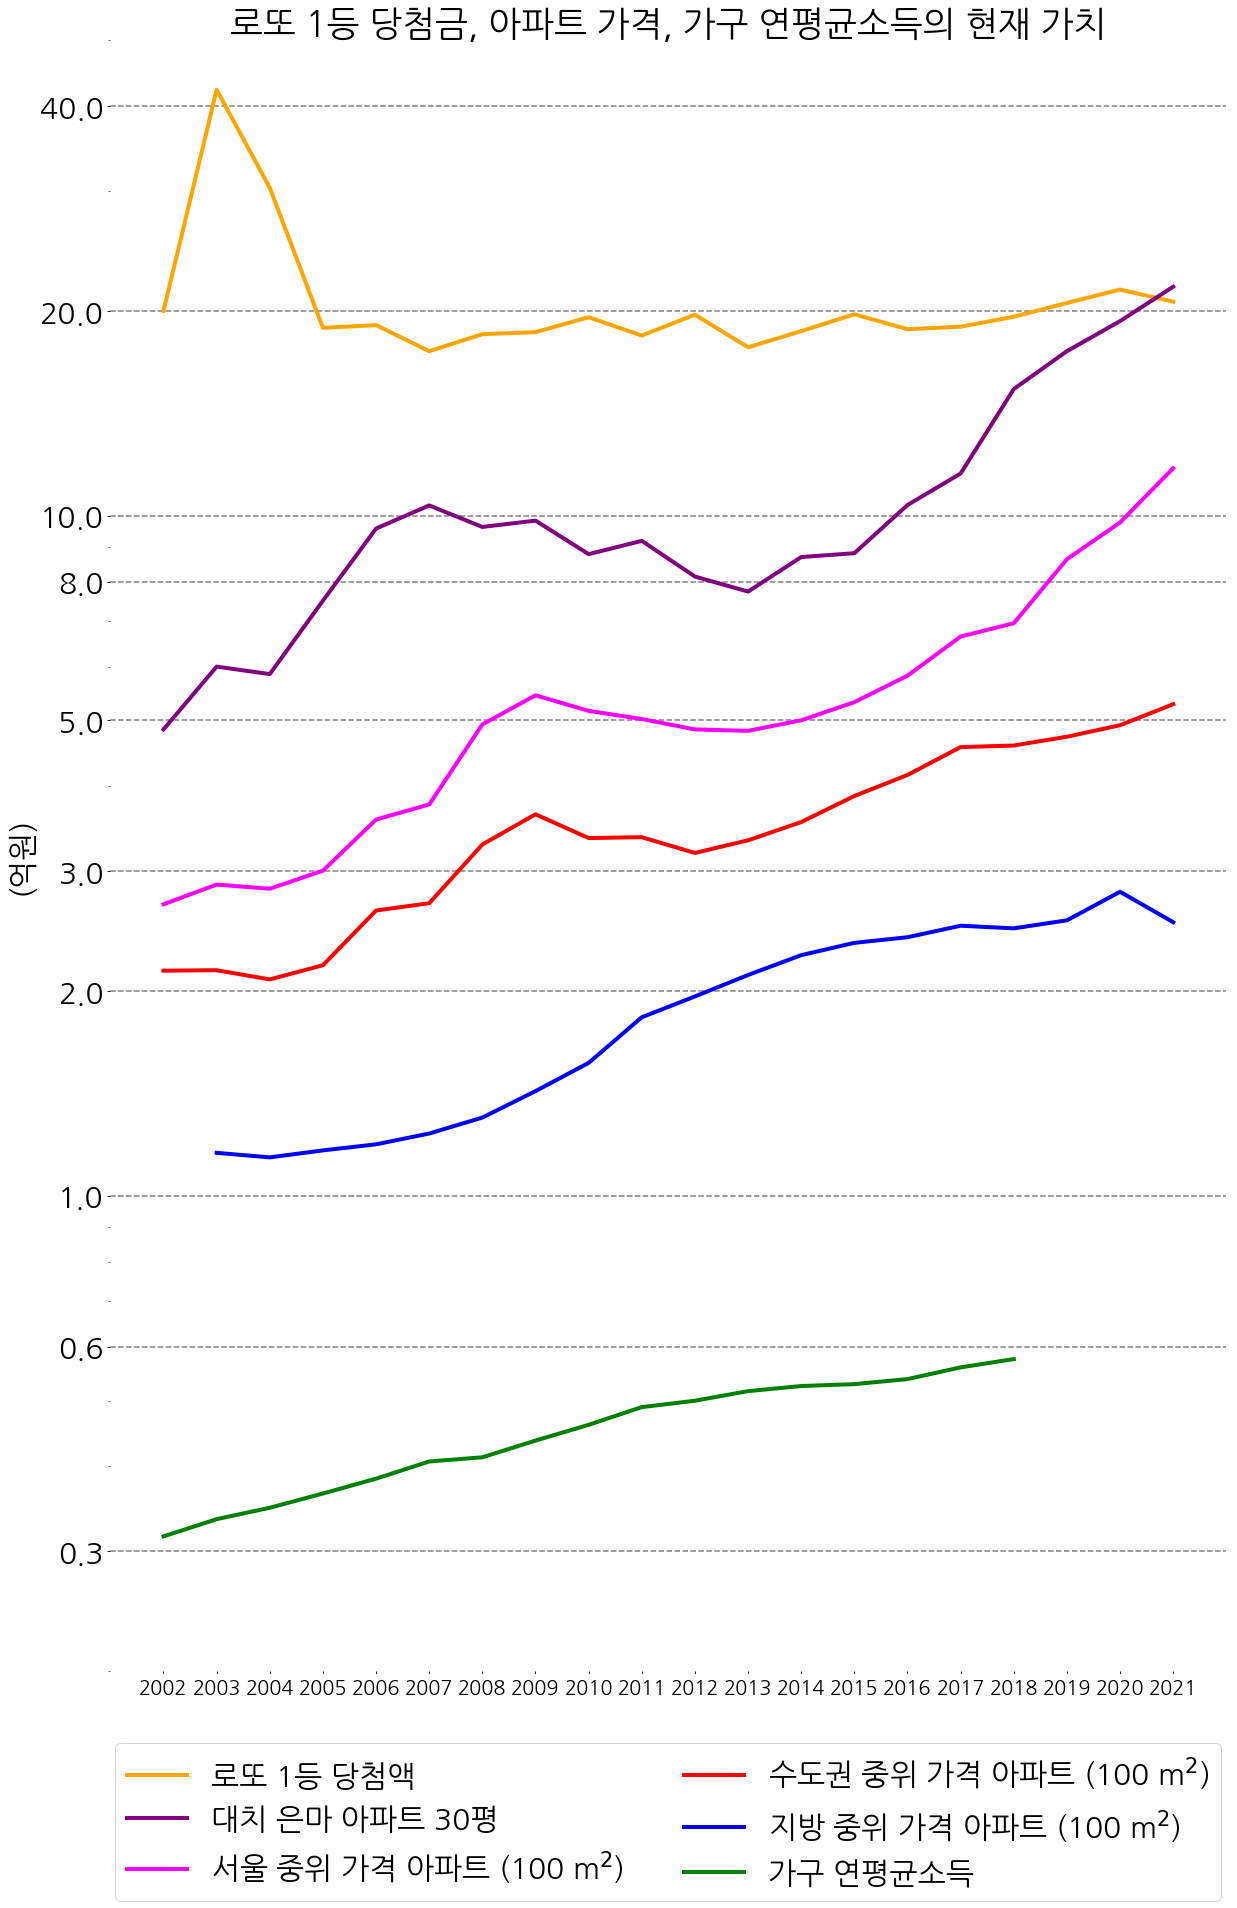

In [110]:
fig = plt.figure(figsize=(20,30))

###########################
# 1. 로또 1등 당첨금의 환산 가치
###########################

ax = plt.subplot(1, 1, 1)
plt.yscale('log', basey=10)
ax.yaxis.set_major_formatter(ScalarFormatter())

for _pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[_pos].set_visible(False)

# solid lines for converted price at 2020
legend_text = ['로또 1등 당첨액', '대치 은마 아파트 30평', '서울 중위 가격 아파트 (100 m$^2$)', '수도권 중위 가격 아파트 (100 m$^2$)', '지방 중위 가격 아파트 (100 m$^2$)', '가구 연평균소득']
d1, = plt.plot(range(2002,2022), Lprize/10000, linewidth=4, color='orange')
d2, = plt.plot(range(2002,2022), Eunma /10000, linewidth=4, color='purple')
d3, = plt.plot(range(2002,2022), Apt_year_0/10000, linewidth=4, color='magenta')
d4, = plt.plot(range(2002,2022), Apt_year_1/10000, linewidth=4, color='red')
d5, = plt.plot(range(2003,2022), Apt_year_2/10000, linewidth=4, color='blue')
d6, = plt.plot(range(2002,2019), Hincome_avg_year/10000, linewidth=4, color='g')

d_lines = [d1,d2,d3,d4,d5,d6]

# horizontal lines
yticks_list = [0.3, 0.6, 1, 2, 3, 5, 8, 10, 20, 40]
for i in yticks_list:
    plt.hlines(i, 2001, 2022, colors='gray', linestyles='--')

plt.xlim(2001,2022)
plt.ylim(2*10**-1, 50)
plt.legend(d_lines, legend_text, fontsize=30, ncol = 2, #title='지표', title_fontsize=25, 
                    loc='lower center', bbox_to_anchor=(0.5, -0.15)) #loc='best')#
#                    loc='center right', bbox_to_anchor=(1, 0.3))

plt.xticks(range(2002,2022), fontsize=20, backgroundcolor='white')
plt.yticks(yticks_list, fontsize=30)
plt.ylabel('(억원)', fontsize=30)
plt.title('로또 1등 당첨금, 아파트 가격, 가구 연평균소득의 현재 가치', fontsize=35)#, pad=0)
#ax.yaxis.set_minor_formatter(ScalarFormatter())

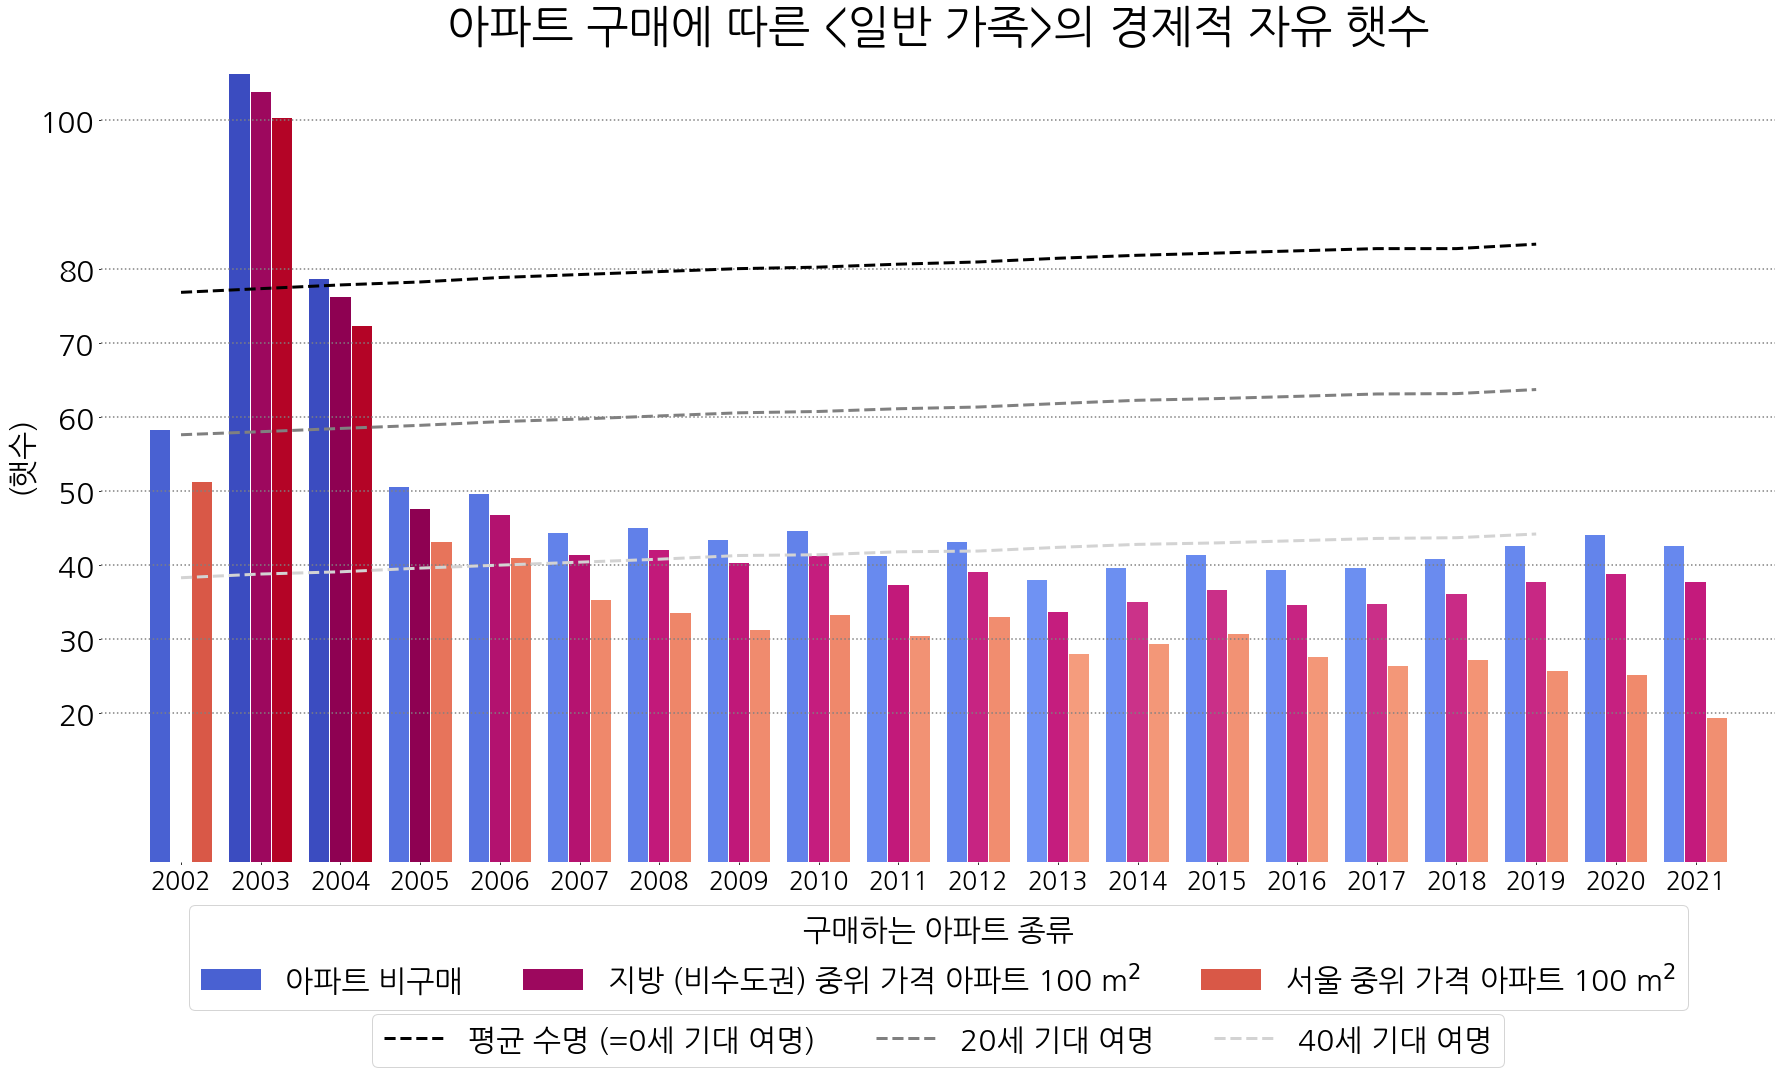

In [186]:
bar = np.array([i for i in range(2002,2022)])
width = 0.4

##################################
# 3. 아파트 구매 여부에 따른 경제적 자유 햇수 (보통 가구)
##################################
fig = plt.figure(figsize=(30,15))

ax = plt.subplot(1, 1, 1)
for _pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[_pos].set_visible(False)

a1 = plt.bar(bar - width/1.5, labor_free_year_avg, width/3*1.9, color=my_cmap(rescale_blue(labor_free_year_2member)))
a2 = plt.bar(bar[1:len(bar)], labor_free_rural_avg, width/3*1.9, color=magenta_cmap(rescale_magenta(labor_free_year)))
a3 = plt.bar(bar + width/1.5, labor_free_seoul_avg, width/3*1.9, color=my_cmap(rescale_red(labor_free_year)))
labor_free_text = ['아파트 비구매', '지방 (비수도권) 중위 가격 아파트 100 m$^2$', '서울 중위 가격 아파트 100 m$^2$']

e1, = plt.plot(range(2002,2020), expected_life, '--', linewidth=3, color='black')
e2, = plt.plot(range(2002,2020), expected_life_at20, '--', linewidth=3, color='gray')
e3, = plt.plot(range(2002,2020), expected_life_at40, '--', linewidth=3, color='lightgray')

life_text = ['평균 수명 (=0세 기대 여명)', '20세 기대 여명', '40세 기대 여명']

legend2_1 = ax.legend([a1, a2, a3], labor_free_text, fontsize=30, title='구매하는 아파트 종류', bbox_to_anchor=(0.5,-0.2), title_fontsize=30,
                      loc='lower center', ncol = 3)
legend2_2 = ax.legend([e1, e2, e3], life_text, fontsize=30, loc='lower center', ncol=3, bbox_to_anchor=(0.5,-0.27))

plt.gca().add_artist(legend2_1)

plt.xlim([2001,2022])
plt.ylim([0, 110])
plt.xticks(range(2002,2022), fontsize=25, backgroundcolor='white')
plt.yticks(yticks3, fontsize=30, backgroundcolor='white')
plt.ylabel('(햇수)', fontsize=30)

# horizontal lines
yticks3 = [20, 30, 40, 50, 60, 70, 80, 100]
for val in yticks3:
    plt.hlines(val, 2001, 2022, colors='gray', linestyles='dotted')

ax.set_title('아파트 구매에 따른 <일반 가족>의 경제적 자유 햇수', fontsize=45, backgroundcolor='white')
plt.show()

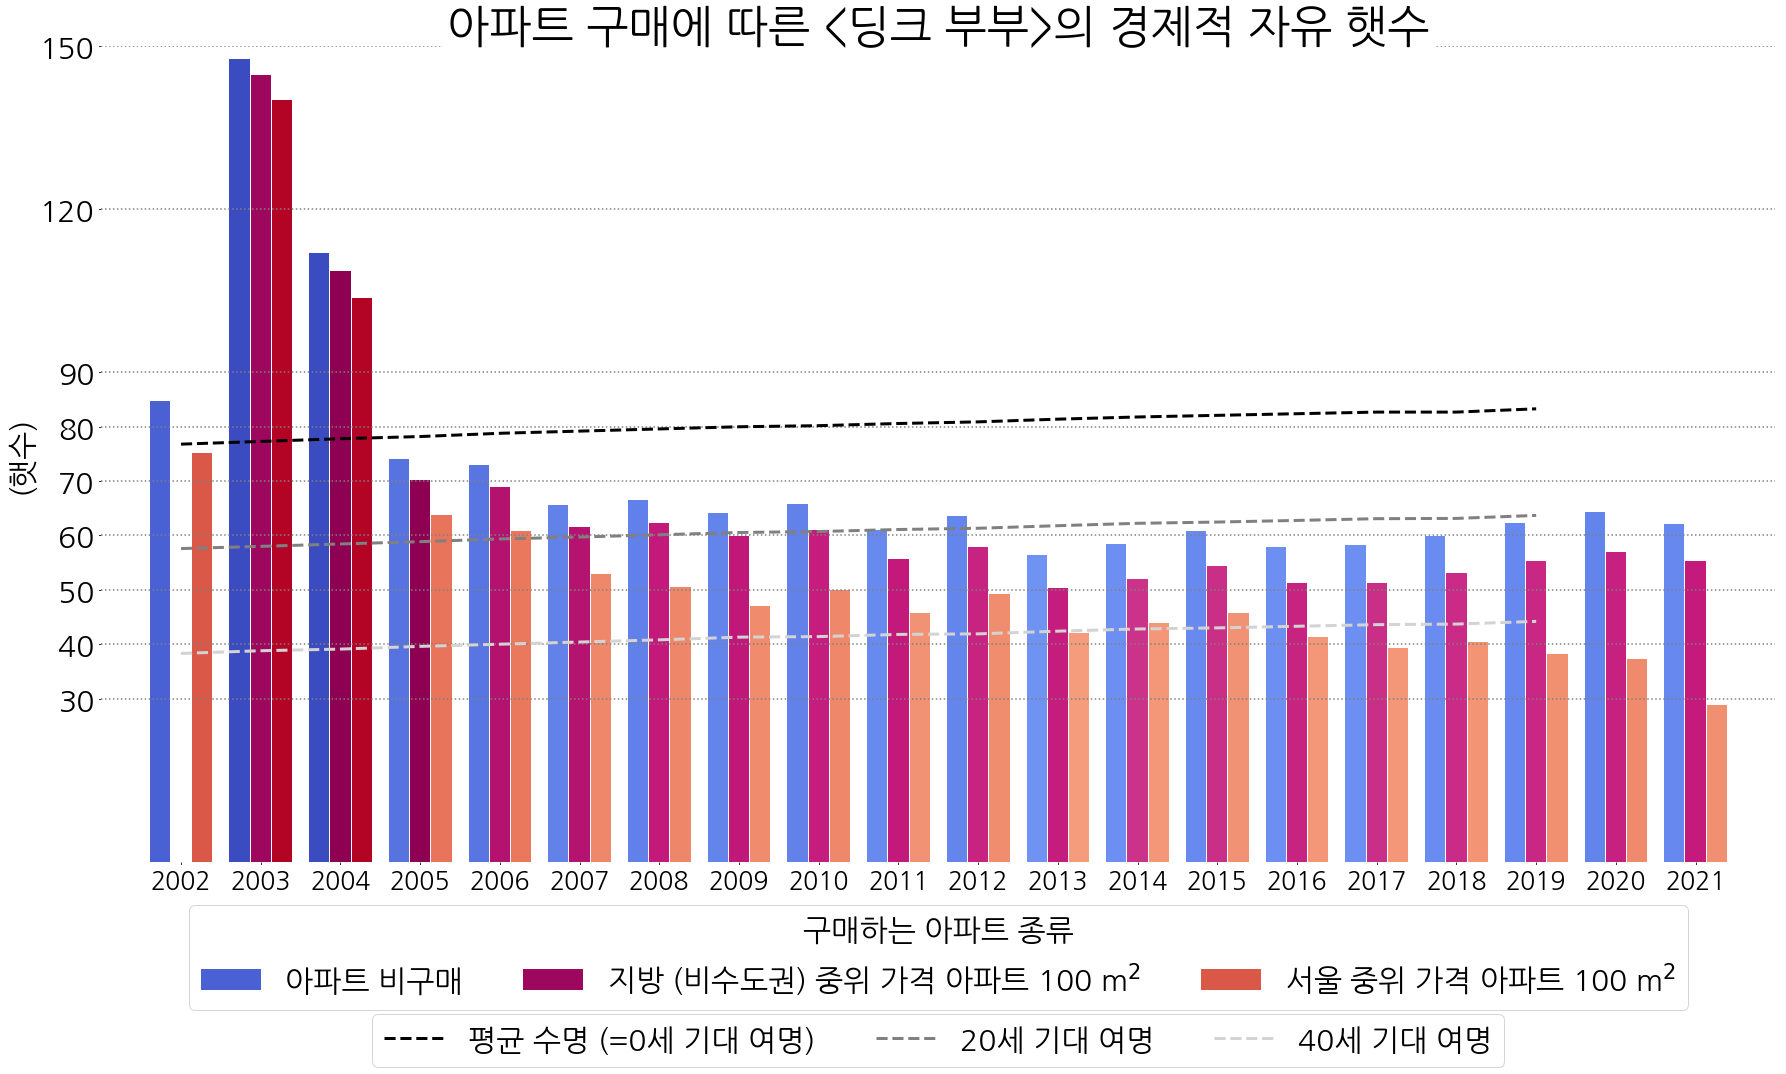

In [188]:
bar = np.array([i for i in range(2002,2022)])
width = 0.4

##################################
# 3. 아파트 구매 여부에 따른 경제적 자유 햇수 (딩크, 2인 가구)
##################################
fig = plt.figure(figsize=(30,15))

ax = plt.subplot(1, 1, 1)
for _pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[_pos].set_visible(False)

a1 = plt.bar(bar - width/1.5, labor_free_year_2member, width/3*1.9, color=my_cmap(rescale_blue(labor_free_year_2member)))
a2 = plt.bar(bar[1:len(bar)], labor_free_rural, width/3*1.9, color=magenta_cmap(rescale_magenta(labor_free_year)))
a3 = plt.bar(bar + width/1.5, labor_free_seoul, width/3*1.9, color=my_cmap(rescale_red(labor_free_year)))
labor_free_text = ['아파트 비구매', '지방 (비수도권) 중위 가격 아파트 100 m$^2$', '서울 중위 가격 아파트 100 m$^2$']

e1, = plt.plot(range(2002,2020), expected_life, '--', linewidth=3, color='black')
e2, = plt.plot(range(2002,2020), expected_life_at20, '--', linewidth=3, color='gray')
e3, = plt.plot(range(2002,2020), expected_life_at40, '--', linewidth=3, color='lightgray')

life_text = ['평균 수명 (=0세 기대 여명)', '20세 기대 여명', '40세 기대 여명']

legend2_1 = ax.legend([a1, a2, a3], labor_free_text, fontsize=30, title='구매하는 아파트 종류', bbox_to_anchor=(0.5,-0.2), title_fontsize=30,
                      loc='lower center', ncol = 3)
legend2_2 = ax.legend([e1, e2, e3], life_text, fontsize=30, loc='lower center', ncol=3, bbox_to_anchor=(0.5,-0.27))

# legend2_1 = ax.legend([a1, a2, a3], labor_free_text, fontsize=25, title='구매하는 아파트 종류', bbox_to_anchor=(0.5,-0.13), title_fontsize=25,
#                       loc='lower center', ncol = 3)
# legend2_2 = ax.legend([e1, e2, e3], life_text, fontsize=25, loc='lower center', ncol=3, bbox_to_anchor=(0.5,-0.18))

plt.gca().add_artist(legend2_1)

plt.xlim([2001,2022])
plt.ylim([0, 110])
plt.xticks(range(2002,2022), fontsize=25, backgroundcolor='white')
plt.yticks(yticks3, fontsize=30, backgroundcolor='white')
plt.ylabel('(햇수)', fontsize=30)

# horizontal lines
yticks3 = [30, 40, 50, 60, 70, 80, 90, 120, 150]
for val in yticks3:
    plt.hlines(val, 2001, 2022, colors='gray', linestyles='dotted')

    
ax.set_title('아파트 구매에 따른 <딩크 부부>의 경제적 자유 햇수', fontsize=45, backgroundcolor='white')
plt.show()

#### save image

In [585]:
plt.tight_layout()
fig.savefig('compiled_image.png')

<Figure size 432x288 with 0 Axes>